I have implemented noise reduction and contrast enhancement in my project for gray scale and RGB images. Noise reduction is done with a median filter. Contrast enhancement is based on the equalization process. 

I have 2 main functions in my code, the first one 'med_filt' check if the image is a RGB or a gray scale one and then applies the median filter to the image. Then the second function 'enhance' applies the contrast enhancement and then the function calls the first one to perform the noise reduction. Finally the original image and the enhanced one are displayed in the notebook.

The function 'cumul_hist' down here is used to the equalization of the histogram in order to enhance the contrast of the image

In [ ]:
def cumul_hist(im):
    cumul_hist = np.zeros((256,))
    c = 0
    for v in range(256):
        c += (im==v).sum()
        cumul_hist[v] = c
    cumul_hist /= cumul_hist.max()
    return cumul_hist

Here is the complete code

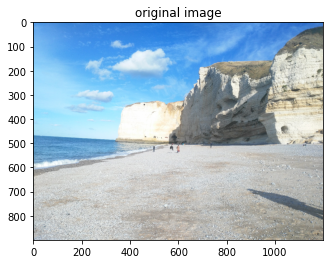

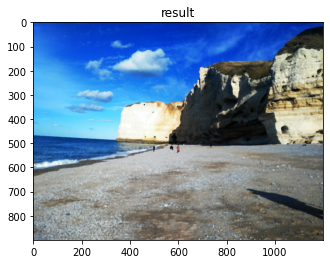

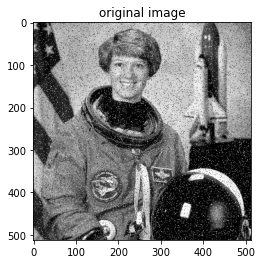

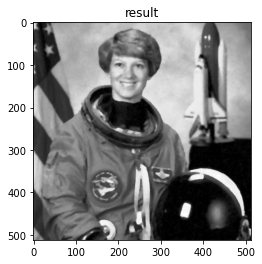

In [8]:
import matplotlib.pyplot as plt
from skimage.filters.rank import mean, median
from skimage.filters import gaussian
from skimage.morphology import square, disk
from skimage.io import imread,imsave,imshow
import numpy as np

im = imread('nyc.jpg') #basic test image
im1 = imread('bruit.jpg') #test image from my picture 
im2 = imread('astronaut_noisy.jpg') #noisy black and white test image
im3= imread('etretat.jpg') #basic test image


def med_filt(im_out):
    """
    apply a median filter in order to reduce noise on an image 
    """
    a = im_out.ndim #allows to know if we have a RGB or gray scale image
    if a == 3 : 
        r = im_out[:,:,0] 
        g = im_out[:,:,1]
        b = im_out[:,:,2]
        R = median(r, disk(3)) #median filter is apply on each channel of the rgb image
        G = median(g, disk(3))
        B = median(b, disk(3))
        im_out[:,:,0]=R
        im_out[:,:,1]=G
        im_out[:,:,2]=B
        plt.figure()
        plt.title('result')
        plt.imshow(im_out)
        plt.show()
    else : 
        im_out3 = median(im_out, disk(3))
        plt.figure()
        plt.title('result')
        plt.imshow(im_out3, cmap=plt.cm.gray)
        plt.show()


def cumul_hist(im):
    cumul_hist = np.zeros((256,))
    c = 0
    for v in range(256):
        c += (im==v).sum()
        cumul_hist[v] = c
    cumul_hist /= cumul_hist.max()
    return cumul_hist

#fonction qui reprend tout 
def enhance(im):
    #affiche l'image de base: 
    a = im.ndim
    if a == 3 : 
        plt.figure()
        plt.title('original image')
        plt.imshow(im)
        plt.show()
    else : 
        plt.figure()
        plt.title('original image')
        plt.imshow(im, cmap=plt.cm.gray)
        plt.show()
        
    #contrast enhancement
    h = cumul_hist(im)
    lut = (h*255).astype('uint8')
    im_out = lut[im]
    #noise reduction
    med_filt(im_out)


enhance(im3)

